In [59]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns




In [60]:
## Part 1: Classification

# Import data
kickstarter_data = pd.read_excel("/Kickstarter.xlsx")

# Displaying the first few rows of the dataset to confirm successful loading and to get an initial understanding
kickstarter_data.head()

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
0,1538064060,MAGIC PIXEL - Bluetooth full color LED display,15000.0,5933.0,failed,False,GB,GBP,2016-03-19 09:31:29,2016-03-19 09:31:32,2015-12-18 03:17:13,2016-02-18 09:31:29,False,66,1.429989,8484.125686,Gadgets,False,8.0,8.0,18.0,14.0,Saturday,Saturday,Friday,Thursday,3,19,2016,9,3,19,2016,9,12,18,2015,3,2,18,2016,9,62,30,30
1,556771080,SmartPi - Turn your Raspberry Pi into a SmartMeter,9000.0,16552.0,successful,False,DE,EUR,2016-04-03 08:05:09,2016-04-03 08:05:10,2016-02-08 09:27:33,2016-02-18 08:05:09,False,131,1.114939,18454.471487,NaN,True,9.0,6.0,23.0,15.0,Sunday,Sunday,Monday,Thursday,4,3,2016,8,4,3,2016,8,2,8,2016,9,2,18,2016,8,9,45,45
2,839314928,PlantSitter - The World's Smartest Plant Monitoring System,60000.0,43234.0,canceled,False,US,USD,2016-03-29 08:01:08,2016-03-28 09:46:41,2016-01-31 05:21:52,2016-02-18 08:01:08,False,632,1.000000,43234.000000,Gadgets,False,8.0,8.0,22.0,12.0,Tuesday,Monday,Sunday,Thursday,3,29,2016,8,3,28,2016,9,1,31,2016,5,2,18,2016,8,18,40,39
3,681077916,Digital Video LUT Box for Colorblindness Correction,125000.0,1262.0,canceled,False,US,USD,2016-03-19 07:48:02,2016-02-23 09:30:28,2016-01-28 11:21:14,2016-02-18 07:48:02,False,4,1.000000,1262.000000,Hardware,False,7.0,6.0,24.0,16.0,Saturday,Tuesday,Thursday,Thursday,3,19,2016,7,2,23,2016,9,1,28,2016,11,2,18,2016,7,20,30,5
4,1315415013,help send Object Collection to Norway!,2000.0,2300.0,successful,False,US,USD,2016-03-03 17:00:00,2016-03-03 17:00:00,2016-02-16 10:00:06,2016-02-18 07:00:44,False,29,1.000000,2300.000000,Experimental,True,6.0,5.0,19.0,13.0,Thursday,Thursday,Tuesday,Thursday,3,3,2016,17,3,3,2016,17,2,16,2016,10,2,18,2016,7,1,14,14


In [61]:
# Dropping rows with any missing values using dropna()
kickstarter_cleaned = kickstarter_data.dropna()

# Checking the shape of the dataset before and after dropping missing values
original_shape = kickstarter_data.shape
cleaned_shape = kickstarter_cleaned.shape

original_shape, cleaned_shape


((15474, 45), (14077, 45))

In [62]:
# Redefining the target variable as 'state' and filtering out 'canceled' and 'suspended' projects

# Filtering out projects where the state is 'canceled' and 'suspended'
kickstarter_filtered = kickstarter_cleaned[kickstarter_cleaned['state'] != 'canceled']
kickstarter_filtered = kickstarter_cleaned[kickstarter_cleaned['state'] != 'suspended']

# Updated list of predictors including additional columns
updated_predictors = ['category',
    'create_to_launch_days', 
    'launch_to_deadline_days',
    'static_usd_rate', 'blurb_len_clean', 'name_len_clean'
]

# The target variable is the outcome of the project - 'state'
target = 'state'

# Selecting the updated predictors and the target variable
kickstarter_updated = kickstarter_filtered[updated_predictors + [target]]

# Converting the 'goal' amount to USD and dropping the original 'goal' column
kickstarter_updated['goal_usd'] = kickstarter_filtered['goal'] * kickstarter_updated['static_usd_rate']
kickstarter_updated.drop(['static_usd_rate'], axis=1, inplace=True)



# Encoding the 'state' variable as binary (1 for 'successful', 0 for 'failed')
kickstarter_updated['state'] = kickstarter_updated['state'].apply(lambda x: 1 if x == 'successful' else 0)

# Displaying the first few rows of the updated dataset
kickstarter_updated.head()


C:\Users\vince\AppData\Local\Temp\ipykernel_34168\2297483344.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kickstarter_updated['goal_usd'] = kickstarter_filtered['goal'] * kickstarter_updated['static_usd_rate']
C:\Users\vince\AppData\Local\Temp\ipykernel_34168\2297483344.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kickstarter_updated.drop(['static_usd_rate'], axis=1, inplace=True)
C:\Users\vince\AppData\Local\Temp\ipykernel_34168\2297483344.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,category,create_to_launch_days,launch_to_deadline_days,blurb_len_clean,name_len_clean,state,goal_usd
0,Gadgets,62,30,14.0,8.0,0,21449.8374
2,Gadgets,18,40,12.0,8.0,0,60000.0000
3,Hardware,20,30,16.0,6.0,0,125000.0000
4,Experimental,1,14,13.0,5.0,1,2000.0000
5,Plays,21,60,14.0,4.0,1,3000.0000


In [63]:
from sklearn.preprocessing import StandardScaler

# Identifying numeric predictors
numeric_predictors = ['goal_usd', 'blurb_len_clean', 'name_len_clean', 'create_to_launch_days', 
                      'launch_to_deadline_days']

# Initializing the StandardScaler
scaler = StandardScaler()

# Applying the scaler to the numeric predictors
kickstarter_updated[numeric_predictors] = scaler.fit_transform(kickstarter_updated[numeric_predictors])

# Displaying the first few rows of the updated dataset
kickstarter_updated.head()


C:\Users\vince\AppData\Local\Temp\ipykernel_34168\954287265.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kickstarter_updated[numeric_predictors] = scaler.fit_transform(kickstarter_updated[numeric_predictors])


,category,create_to_launch_days,launch_to_deadline_days,blurb_len_clean,name_len_clean,state,goal_usd
0,Gadgets,0.147587,-0.396387,0.302163,1.171355,0,-0.055418
2,Gadgets,-0.282496,0.433989,-0.316149,1.171355,0,-0.023883
3,Hardware,-0.262947,-0.396387,0.920475,0.336540,0,0.029288
4,Experimental,-0.448665,-1.724989,-0.006993,-0.080868,1,-0.071328
5,Plays,-0.253172,2.094741,0.302163,-0.498275,1,-0.070510


In [64]:
#Dummifying the categorical variables
kickstarter_encoded = pd.get_dummies(kickstarter_updated, columns=['category'])


In [65]:
# Using isolation forest to remove outliers

from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
kickstarter_encoded['outliers'] = iso_forest.fit_predict(kickstarter_encoded)
cleaned_data = kickstarter_encoded[kickstarter_encoded['outliers'] == 1]
cleaned_data.drop(['outliers'], axis=1, inplace=True)
kickstarter_encoded = cleaned_data

C:\Users\vince\AppData\Local\Temp\ipykernel_34168\568920422.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(['outliers'], axis=1, inplace=True)


In [66]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

X = kickstarter_encoded.drop('state', axis=1)
y = kickstarter_encoded['state']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [67]:
#logistic regression
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_logistic = logistic_model.predict(X_test)


C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)


In [69]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_forest = forest_model.predict(X_test)


In [70]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
from sklearn.metrics import classification_report, accuracy_score
y_pred_gbc = gbc.predict(X_test)



In [71]:
#Displaying the accuracy scores for all the models
from sklearn.metrics import accuracy_score, classification_report

models = [logistic_model, tree_model, forest_model,gbc]
predictions = [y_pred_logistic, y_pred_tree, y_pred_forest,y_pred_gbc]

for model, prediction in zip(models, predictions):
    accuracy = accuracy_score(y_test, prediction)
    report = classification_report(y_test, prediction)
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("-" * 50)


Model: LogisticRegression
Accuracy: 0.7473294091999128
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84      3266
           1       0.62      0.31      0.41      1321

    accuracy                           0.75      4587
   macro avg       0.70      0.62      0.63      4587
weighted avg       0.73      0.75      0.72      4587

--------------------------------------------------
Model: DecisionTreeClassifier
Accuracy: 0.6723348593852191
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      3266
           1       0.43      0.46      0.45      1321

    accuracy                           0.67      4587
   macro avg       0.60      0.61      0.61      4587
weighted avg       0.68      0.67      0.67      4587

--------------------------------------------------
Model: RandomForestClassifier
Accuracy: 0.7521255722694572
Classification Report:


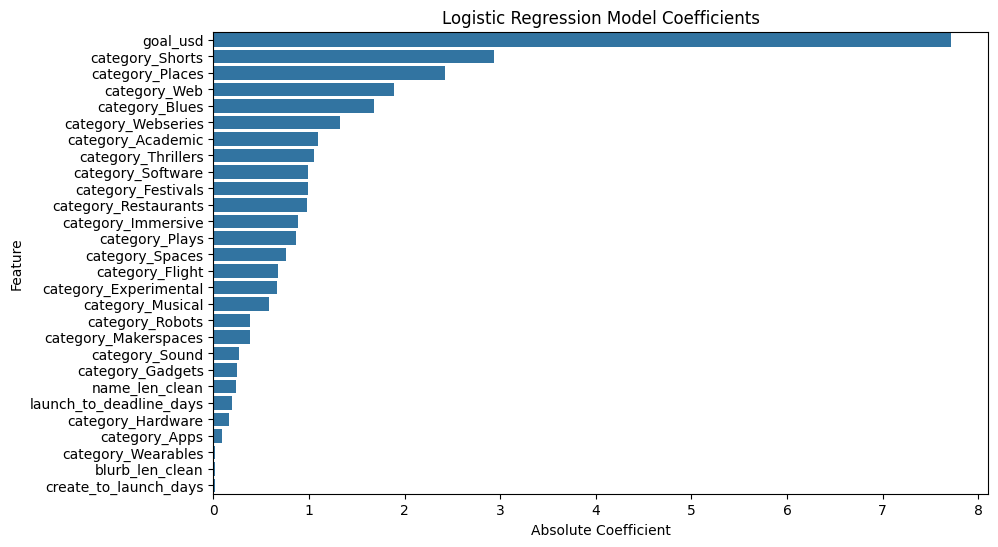

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming logistic_model is your trained Logistic Regression model
# and X_train contains your training data

# Retrieve the coefficients and feature names
coefficients = logistic_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()

# Sort the DataFrame by the absolute values of coefficients for better visualization
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=coef_df)
plt.title('Logistic Regression Model Coefficients')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()



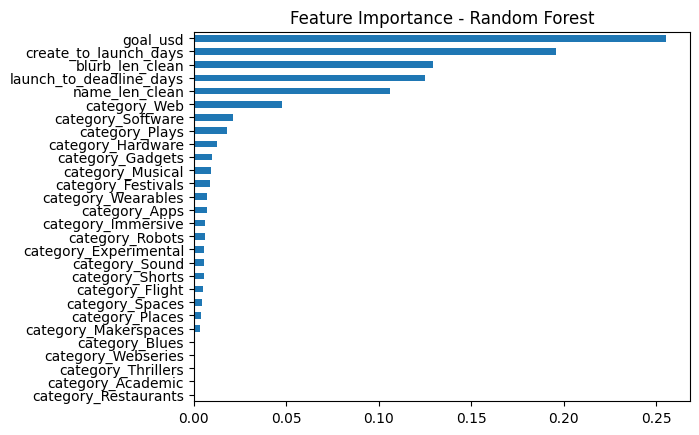

In [73]:
# Feature importance for Random Forest
importances_forest = forest_model.feature_importances_

# To display the feature importance scores
feature_names = X.columns
forest_importances = pd.Series(importances_forest, index=feature_names)
forest_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance - Random Forest')
plt.show()



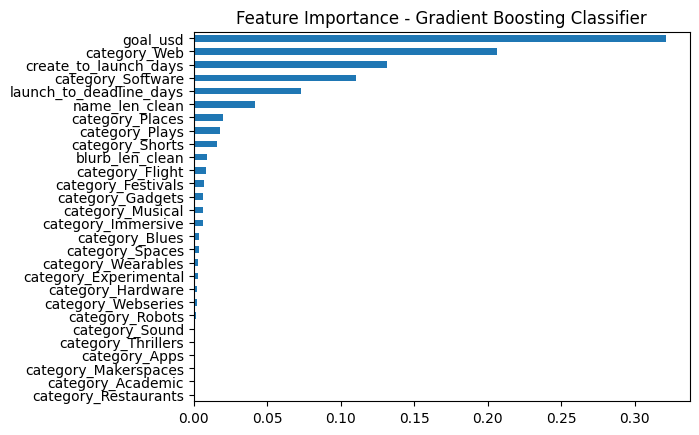

In [74]:
gbc_importance = gbc.feature_importances_


# To display the feature importance scores
feature_names = X.columns
gbc_importances = pd.Series(gbc_importance, index=feature_names)
gbc_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance - Gradient Boosting Classifier')
plt.show()

In [75]:
#Grading Dataset

# Load grading dataset
k1 = pd.read_excel("C:/Users/vince/Desktop/Files/MMA McGill/2023 Fall/INSY-662/Individual Project/Kickstarter-Grading-Sample.xlsx")

# Preprocessing steps (similar to those applied to the original dataset)

# Dropping rows with any missing values using dropna()
k1c = k1.dropna()

# Checking the shape of the dataset before and after dropping missing values
original_shape = k1.shape
cleaned_shape = k1c.shape

original_shape, cleaned_shape
# Redefining the target variable as 'state' and filtering out 'canceled' projects

# Filtering out projects where the state is 'canceled'
k1f = k1c[k1c['state'] != 'canceled']
k1f = k1c[k1c['state'] != 'suspended']

predictors = ['category',
    'create_to_launch_days', 
    'launch_to_deadline_days',
    'static_usd_rate', 'blurb_len_clean', 'name_len_clean'
]

# The target variable is the outcome of the project - 'state'
target = 'state'

# Selecting the updated predictors and the target variable
k1u = k1f[predictors + [target]]

# Converting the 'goal' amount to USD and dropping the original 'goal' column
k1u['goal_usd'] = k1f['goal'] * k1u['static_usd_rate']
k1u.drop(['static_usd_rate'], axis=1, inplace=True)



# Encoding the 'state' variable as binary (1 for 'successful', 0 for 'failed')
k1u['state'] = k1u['state'].apply(lambda x: 1 if x == 'successful' else 0)

# Displaying the first few rows of the updated dataset
k1u.head()

# Identifying numeric predictors
numeric_predictors = ['goal_usd', 'blurb_len_clean', 'name_len_clean', 'create_to_launch_days', 
                      'launch_to_deadline_days']

# Initializing the StandardScaler
scaler = StandardScaler()

# Applying the scaler to the numeric predictors
k1u[numeric_predictors] = scaler.fit_transform(k1u[numeric_predictors])

# Displaying the first few rows of the updated dataset
k1u.head()

#Dummifying the categorical variables
k1e = pd.get_dummies(k1u, columns=['category'])

X1 = k1e.drop('state', axis=1)
y1= k1e['state']

testmodel1 = logistic_model

# Predicting on the test set
y_pred = testmodel1.predict(X1)
accuracy = accuracy_score(y1, y_pred)
report = classification_report(y1, y_pred)
print("Logistical Model")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Logistical Model
Accuracy: 0.7569367369589345
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1256
           1       0.60      0.57      0.59       546

    accuracy                           0.76      1802
   macro avg       0.71      0.70      0.71      1802
weighted avg       0.75      0.76      0.75      1802



C:\Users\vince\AppData\Local\Temp\ipykernel_34168\2733252583.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k1u['goal_usd'] = k1f['goal'] * k1u['static_usd_rate']
C:\Users\vince\AppData\Local\Temp\ipykernel_34168\2733252583.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k1u.drop(['static_usd_rate'], axis=1, inplace=True)
C:\Users\vince\AppData\Local\Temp\ipykernel_34168\2733252583.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [76]:
## Part 2 - Clustering

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data (replace 'your_data.csv' with your actual data file)
df = pd.read_excel("C:/Users/vince/Desktop/Files/MMA McGill/2023 Fall/INSY-662/Individual Project/Kickstarter.xlsx")

df = df.dropna()

df = df[df['state'] != 'canceled']
df = df[df['state'] != 'suspended']

features = ['goal','static_usd_rate', 
'state', 
'backers_count', 'usd_pledged',
'category','name_len_clean',
#'blurb_len_clean',
'create_to_launch_days','launch_to_deadline_days','launch_to_state_change_days'
]
df = df[features]

df['goal_usd'] = df['goal'] * df['static_usd_rate']
df.drop(['static_usd_rate'], axis=1, inplace=True)
df.drop(['goal'], axis=1, inplace=True)

df1=df.copy()

numeric_predictors = ['goal_usd', 
#'blurb_len_clean', 
'backers_count','usd_pledged',
'name_len_clean',
# 'blurb_len_clean', 
'create_to_launch_days', 'launch_to_deadline_days',
'launch_to_state_change_days'
]

from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying the scaler to the numeric predictors
df[numeric_predictors] = scaler.fit_transform(df[numeric_predictors])



# Apply transformations
df_encoded = pd.get_dummies(df, columns=['category','state'])


C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

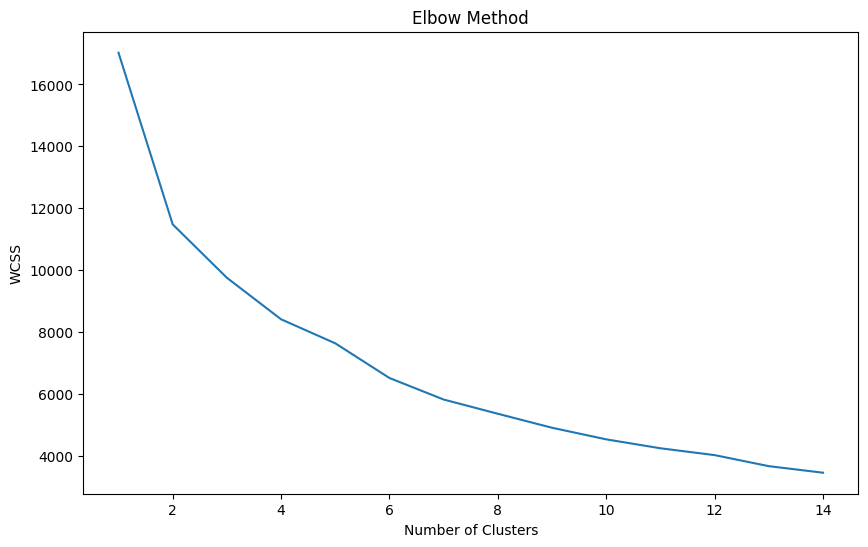

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Selecting features for clustering
# Assuming 'df_encoded' is the DataFrame after preprocessing
#X1 = df_encoded.drop(['state_failed', 'state_successful'], axis=1)  # Drop target variable for clustering

# Elbow method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [78]:
# Choose the number of clusters based on the elbow and silhouette methods and run final KMeans
# Replace 'n_clusters' with the chosen number of clusters
n_clusters = 6
final_kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
final_kmeans.fit(df_encoded)

# The cluster labels can be accessed with final_kmeans.labels_


C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

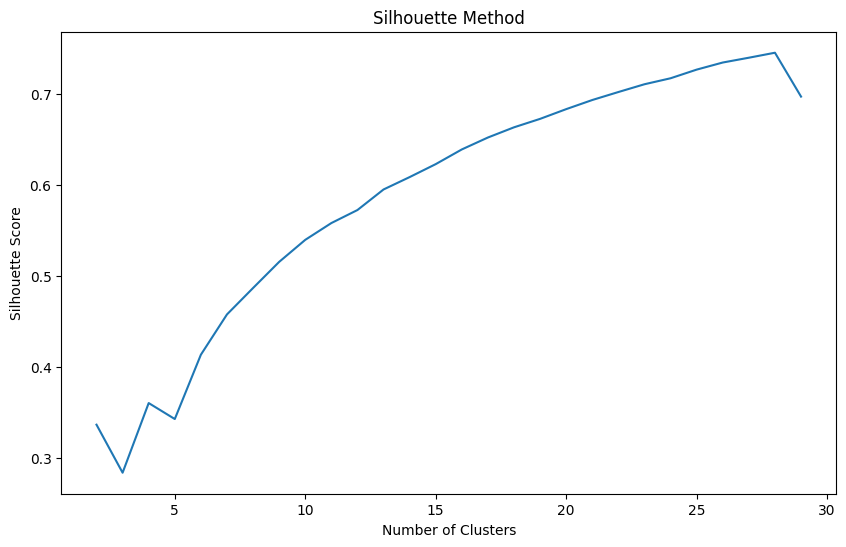

In [79]:
# Silhouette method
silhouette_scores = []
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_encoded)
    score = silhouette_score(df_encoded, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 30), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [80]:
# Choose the number of clusters based on the elbow and silhouette methods and run final KMeans
# Replace 'n_clusters' with the chosen number of clusters
n_clusters = 6
sil_kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
sil_kmeans.fit(df_encoded)

# The cluster labels can be accessed with final_kmeans.labels_


C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [81]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from scipy.stats import f


In [82]:
pd.set_option('display.max_rows', None)  # Be cautious with very large DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [83]:
df1['cluster'] = final_kmeans.labels_
cluster_summaries = df1.groupby('cluster').describe()
cluster_summaries

backers_count                                                     \
                count        mean          std  min   25%    50%     75%   
cluster                                                                    
0               926.0  830.369330  2406.511673  1.0  91.0  282.0  727.25   
1              1967.0    6.121505    31.536766  0.0   0.0    1.0    4.00   
2              3288.0   24.609185    89.146408  0.0   1.0    5.0   17.00   
3              1542.0   14.051232    41.523759  0.0   1.0    3.0   12.00   
4              3036.0  385.583333  2182.441368  1.0  32.0   73.0  231.25   
5              1421.0   53.140746   129.403055  0.0   5.0   16.0   49.00   

                  usd_pledged                                          \
              max       count           mean            std       min   
cluster                                                                 
0         39560.0       926.0  103755.548202  219532.037270  18.41464   
1          1009.0      1967.0     538.493092    2828.634753   0.00000   
2          2620.0      3288.0    2866.129239   11366.456229   0.00000   
3           718.0      1542.0    1008.974500    3448.716046   0.00000   
4        105857.0      3036.0   40989.612024  189783.870478   3.00000   
5          2388.0      1421.0    7107.026055   28001.333634   0.00000   

                                                          name_len_clean  \
             25%           50%            75%         max          count   
cluster                                                                    
0        8939.50  34178.530584  104052.854979  2344134.67          926.0   
1           0.00      7.434038     111.000000    58369.00         1967.0   
2          11.00    170.868507    1338.169482   231190.00         3288.0   
3           1.00     75.242875     484.000000    48965.01         1542.0   
4        2359.61   6396.500000   23530.750000  6225354.98         3036.0   
5         177.00   1210.000000    5422.000000   721036.46         1421.0   

                                                      create_to_launch_days  \
             mean       std  min  25%  50%  75%   max                 count   
cluster                                                                       
0        6.176026  2.199830  1.0  5.0  6.0  8.0  12.0                 926.0   
1        4.105236  2.411107  1.0  2.0  4.0  6.0  12.0                1967.0   
2        4.983273  2.348033  1.0  3.0  5.0  7.0  13.0                3288.0   
3        4.656939  2.338283  1.0  3.0  5.0  6.0  13.0                1542.0   
4        5.550066  2.327784  1.0  4.0  6.0  7.0  13.0                3036.0   
5        5.641802  2.306555  1.0  4.0  6.0  7.0  14.0                1421.0   

                                                                \
              mean         std  min   25%   50%    75%     max   
cluster                                                          
0        64.726782  106.110579  0.0  13.0  30.0  68.00   992.0   
1        32.778343   92.156606  0.0   2.0   6.0  23.00  1262.0   
2        44.750000   99.593638  0.0   3.0  12.0  40.25  1458.0   
3        42.036316  106.697696  0.0   2.0   9.0  31.75  1336.0   
4        43.558300   95.772480  0.0   5.0  15.0  41.00  1528.0   
5        70.163969  118.501176  0.0   8.0  27.0  76.00  1147.0   

        launch_to_deadline_days                                               \
                          count       mean        std  min   25%   50%   75%   
cluster                                                                        
0                         926.0  34.066955   9.873461  7.0  30.0  30.0  37.0   
1                        1967.0  35.444331  12.530850  1.0  30.0  30.0  40.0   
2                        3288.0  35.127129  12.194934  1.0  30.0  30.0  40.0   
3                        1542.0  36.103113  13.849113  4.0  30.0  30.0  41.0   
4                        3036.0  32.074440  11.098736  2.0  29.0  30.0  35.0   
5                        1421.0  

In [90]:
# Add the cluster labels to the dataframe
df1['cluster'] = final_kmeans.labels_

# Group by 'cluster' and 'state', then count the number of occurrences
# Assuming 'state' is a binary variable where 1 represents success and 0 represents failure
cluster_state_counts = df1.groupby(['cluster', 'state']).size().unstack()

# Display the count of success and failure for each cluster
print(cluster_state_counts)


state    failed  successful
cluster                    
0           NaN       926.0
1        1967.0         NaN
2        3288.0         NaN
3        1542.0         NaN
4           NaN      3036.0
5        1421.0         NaN


In [91]:
# Group by 'cluster' and 'category', then count the number of occurrences
cluster_category_counts = df1.groupby(['cluster', 'category']).size().unstack()

# Display the count of each category in each cluster
print("\nCount of Each Category in Each Cluster:")
print(cluster_category_counts)



Count of Each Category in Each Cluster:
category  Academic   Apps  Blues  Experimental  Festivals  Flight  Gadgets  \
cluster                                                                      
0              NaN    NaN    NaN           NaN        NaN     NaN      NaN   
1              NaN    NaN    NaN           NaN        NaN     NaN      NaN   
2             15.0  519.0    NaN          93.0      120.0   189.0    839.0   
3              NaN    NaN    NaN           NaN        NaN     NaN      NaN   
4              NaN  223.0   10.0         133.0      206.0    58.0    405.0   
5              NaN    NaN    NaN           NaN        NaN     NaN      NaN   

category  Hardware  Immersive  Makerspaces  Musical  Places  Plays  Robots  \
cluster                                                                      
0            926.0        NaN          NaN      NaN     NaN    NaN     NaN   
1              NaN        NaN          NaN      NaN     NaN    NaN     NaN   
2              NaN    

C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


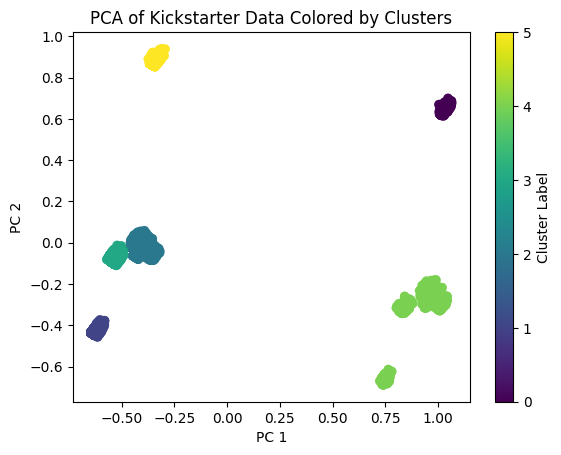

In [92]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Perform KMeans clustering
# Replace n_clusters with your optimal number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(df_encoded)

# PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_encoded)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Scatter plot colored by clusters
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=clusters, cmap='viridis')  # Coloring based on clusters
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA of Kickstarter Data Colored by Clusters")
plt.colorbar(label='Cluster Label')
plt.show()


In [87]:
#DBSCAN for comparison to kmeans

from matplotlib import pyplot
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=500)
labels = dbscan.fit_predict(df_encoded)

In [88]:
# Count the number of unique clusters (excluding noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters

6

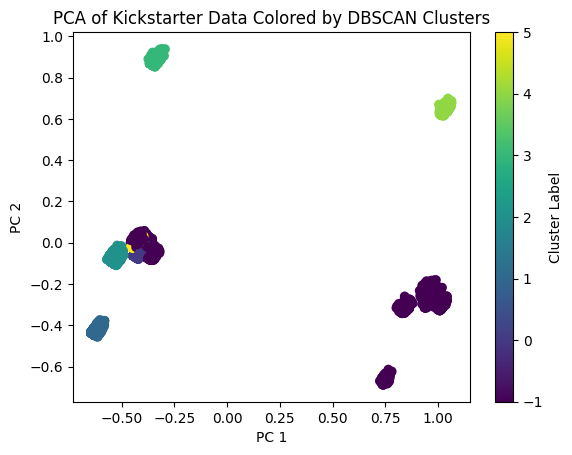

In [89]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Apply DBSCAN clustering
labels = dbscan.fit_predict(df_encoded)

# PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_encoded)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Scatter plot colored by DBSCAN cluster labels
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=labels, cmap='viridis')  # Coloring based on DBSCAN clusters
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA of Kickstarter Data Colored by DBSCAN Clusters")
plt.colorbar(label='Cluster Label')
plt.show()

